# Code Challenge

# Librairies

In [14]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
from sklearn.metrics import confusion_matrix, classification_report
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

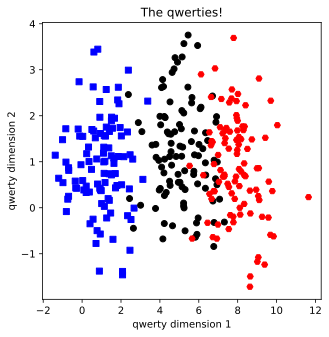

In [15]:
#Generate Data 
nPerClust = 100
blur = 1

A = [  1, 1 ]
B = [  5, 1 ]
C = [  8, 1 ]

# generate data
a = [ A[0]+np.random.randn(nPerClust)*blur , A[1]+np.random.randn(nPerClust)*blur ]
b = [ B[0]+np.random.randn(nPerClust)*blur , B[1]+np.random.randn(nPerClust)*blur ]
c = [ C[0]+np.random.randn(nPerClust)*blur , C[1]+np.random.randn(nPerClust)*blur ]

# true labels
labels_np = np.vstack((np.zeros((nPerClust, 1)), np.ones((nPerClust, 1)), np.full((nPerClust,1),2)))

# concatenate into a matrix
data_np = np.hstack((a, b, c)).T

# convert to a pytorch tensor
data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()

# show the data
fig = plt.figure(figsize=(5, 5))
plt.plot(data[np.where(labels == 0)[0], 0], data[np.where(labels == 0)[0], 1], 'bs')
plt.plot(data[np.where(labels == 1)[0], 0], data[np.where(labels == 1)[0], 1], 'ko')
plt.plot(data[np.where(labels == 2)[0], 0], data[np.where(labels == 2)[0], 1], 'rH') 
plt.title('The qwerties!')
plt.xlabel('qwerty dimension 1')
plt.ylabel('qwerty dimension 2')
plt.show()

In [16]:
data[:5]

tensor([[ 0.2085,  0.3312],
        [ 1.5004,  1.1292],
        [-1.2041,  0.6411],
        [ 0.7947,  0.5160],
        [-1.3821,  1.1424]])

In [17]:
# Remove error 
labels[:5]

tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.]])

In [18]:
labels = labels.squeeze().long()

In [19]:
labels[:5]

tensor([0, 0, 0, 0, 0])

# Create the model

In [20]:
# model architecture
ANNcc = nn.Sequential(
    nn.Linear(2,4),   # input layer
    nn.ReLU(),         # activation
    nn.Linear(4,4),  # hidden layer
    nn.ReLU(),         # activation
    nn.Linear(4,3),   # output layer
      )

# loss function
lossfun = nn.CrossEntropyLoss()

# optimizer
optimizer = torch.optim.SGD(ANNcc.parameters(),lr=.01)

# Train the model

Final accuracy: 92%


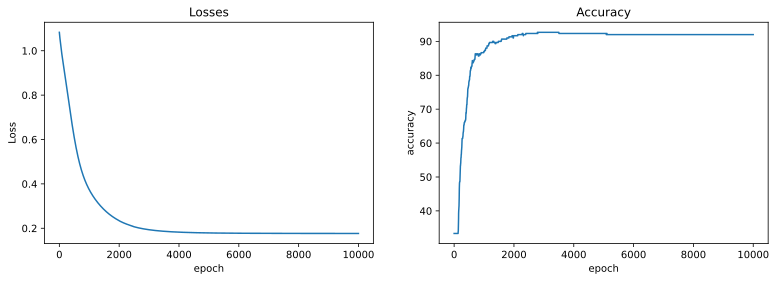

In [21]:
numepochs = 10000

# initialize losses
losses = torch.zeros(numepochs)
ongoingAcc = []

# loop over epochs
for epochi in range(numepochs):

  # forward pass
  yHat = ANNcc(data)

  # compute loss
  loss = lossfun(yHat,labels)
  losses[epochi] = loss

  # backprop
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  # compute accuracy
  matches = torch.argmax(yHat,axis=1) == labels # booleans (false/true)
  matchesNumeric = matches.float()              # convert to numbers (0/1)
  accuracyPct = 100*torch.mean(matchesNumeric)  # average and x100
  ongoingAcc.append( accuracyPct )              # add to list of accuracies

# final forward pass
predictions = ANNcc(data)

predlabels = torch.argmax(predictions,axis=1)
totalacc = 100*torch.mean((predlabels == labels).float())

# report accuracy
print('Final accuracy: %g%%' %totalacc)

fig,ax = plt.subplots(1,2,figsize=(13,4))

ax[0].plot(losses.detach())
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('epoch')
ax[0].set_title('Losses')

ax[1].plot(ongoingAcc)
ax[1].set_ylabel('accuracy')
ax[1].set_xlabel('epoch')
ax[1].set_title('Accuracy')
plt.show()